# Assignment : GDP Analysis

## Part I - GDP Analysis of Indian States

- ### Part I-A

In the first part, we will analyse and compare the GDPs of various Indian states (both total and per capita). The GDP of a state is referred to as the GSDP (Gross State Domestic Product).

In [1]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from functools import reduce

Read the downloaded csv file into DataFrame called `masterdf`

In [2]:
masterdf = pd.read_csv('./ab40c054-5031-4376-b52e-9813e776f65e.csv')

#Lets have a prelimanary look at the dataset
masterdf.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


We can conclude dataset consist of GSDP (in cr) and % Growth over previous year, for various years and for various states as well as all India GDP. 

In [3]:
# Now lets describe the dataset to view it from statistical point of view
masterdf.describe()

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
count,11.000000,9.000000,9.000000,9.000000,11.000000,9.000000,9.000000,11.000000,7.000000,9.000000,...,11.000000,7.000000,9.000000e+00,9.000000,0.0,7.000000,9.000000,11.000000,11.000000,1.100000e+01
mean,280986.561818,8201.516667,100018.167778,181565.673333,120748.879091,22450.120000,448568.674444,228667.271818,50673.064286,53343.001111,...,268570.787273,13739.691429,5.209237e+05,82588.947778,NaN,2759.814286,13707.002222,258693.004545,12527.435455,6.479952e+06
std,282573.532407,8073.276061,97589.497456,178700.497677,120928.480448,21443.429799,438025.627165,228195.895576,48384.121107,51712.668467,...,268734.549079,13240.797263,5.087288e+05,80553.858327,NaN,2627.016700,13399.003286,258176.516280,12445.889343,6.433000e+06
min,8.430000,12.070000,9.560000,10.590000,10.980000,-10.020000,10.820000,9.180000,10.140000,4.700000,...,11.700000,12.780000,1.051000e+01,8.120000,NaN,10.890000,8.840000,10.960000,10.140000,9.990000e+00
25%,14.025000,14.790000,13.190000,14.250000,12.995000,10.750000,11.470000,14.135000,14.155000,11.310000,...,12.840000,17.030000,1.365000e+01,13.650000,NaN,13.905000,14.710000,13.095000,11.815000,1.224500e+01
50%,379402.000000,11063.000000,143175.000000,247144.000000,158074.000000,35921.000000,615606.000000,297539.000000,72720.000000,78254.000000,...,359433.000000,19208.000000,7.240490e+05,115523.000000,NaN,3979.000000,18768.000000,343767.000000,16818.000000,8.736039e+06
75%,495370.000000,14602.000000,177745.000000,317101.000000,220836.000000,40633.000000,807623.000000,419062.000000,88792.000000,95893.000000,...,481682.000000,23628.000000,9.441460e+05,149817.000000,NaN,4790.000000,24787.000000,468103.500000,22979.500000,1.183519e+07
max,699307.000000,18784.000000,224234.000000,413503.000000,290140.000000,45002.000000,994316.000000,547396.000000,104369.000000,118387.000000,...,654294.000000,29667.000000,1.153795e+06,184091.000000,NaN,5721.000000,30304.000000,622385.000000,29557.000000,1.525103e+07


We can notice the following -
- Count for all coloumns are not same hence data consist of null values
- For column `West Bengal1` all values are null i.e. Count is 0

* ### Subtask 1-A.1

Remove the rows: `(% Growth over the previous year)` and `GSDP - CURRENT PRICES (in Crore)` for the year `2016-17`.

In [4]:
print('Shape before :' + str(masterdf.shape))
masterdf = masterdf.drop([5,10])
print('Shape after :' + str(masterdf.shape))

Shape before :(11, 36)
Shape after :(9, 36)


* ### Subtask 1-A.2

Calculate the average growth of states over the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row `(% Growth over previous year)`. Compare the calculated value and plot it for the states.

In [5]:
#Create a subset of dataset taking only rows and columns of interest 
averageGrowthdf = masterdf.iloc[6:9,2:]
averageGrowthdf

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
7,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,10.09,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,4.70,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,17.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


Before calculating mean, lets explore column wise missing values and their std

In [6]:
#Show states where there is atleast one data missing i.e. count < 3

averageGrowthDfDescribe = averageGrowthdf.describe()
averageGrowthDfDescribe.loc[['count', 'std'], averageGrowthDfDescribe.loc['count']<3]

,Himachal Pradesh,Maharashtra,Manipur,Mizoram,Nagaland,Punjab,Rajasthan,Tripura,West Bengal1,Andaman & Nicobar Islands
count,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0,2.000000
std,3.026417,3.50725,4.553768,7.636753,7.870098,1.746554,0.070711,1.569777,NaN,4.094148


We can observe that for `West Bengal1`, no data is available and for other states, data of only 2 years are available so aggregation or extrapolation will not represent original data appropriately hence we can drop these columns.

In [7]:
averageGrowthdf = averageGrowthdf.dropna(axis='columns')
print('Number of null values in averageGrowthdf :' + str(averageGrowthdf.isna().sum().sum()))

Number of null values in averageGrowthdf :0


In [8]:
#Finally lets calculate mean growth 
averageGrowthdf = averageGrowthdf.mean().sort_values(ascending=False)
averageGrowthdf

Arunachal Pradesh    14.413333
Karnataka            14.120000
Andhra Pradesh       14.033333
Chhattisgarh         13.703333
Bihar                13.603333
Telangana            12.763333
Assam                12.650000
Madhya Pradesh       12.626667
Kerala               12.583333
Tamil Nadu           12.336667
Delhi                12.160000
Puducherry           12.053333
Chandigarh           11.960000
Uttar Pradesh        11.940000
Haryana              11.846667
Uttarakhand          11.803333
Jharkhand            11.500000
All_India GDP        11.203333
Gujarat              11.126667
Jammu & Kashmir      10.900000
Sikkim               10.486667
Odisha                9.836667
Meghalaya             6.953333
Goa                   6.033333
dtype: float64

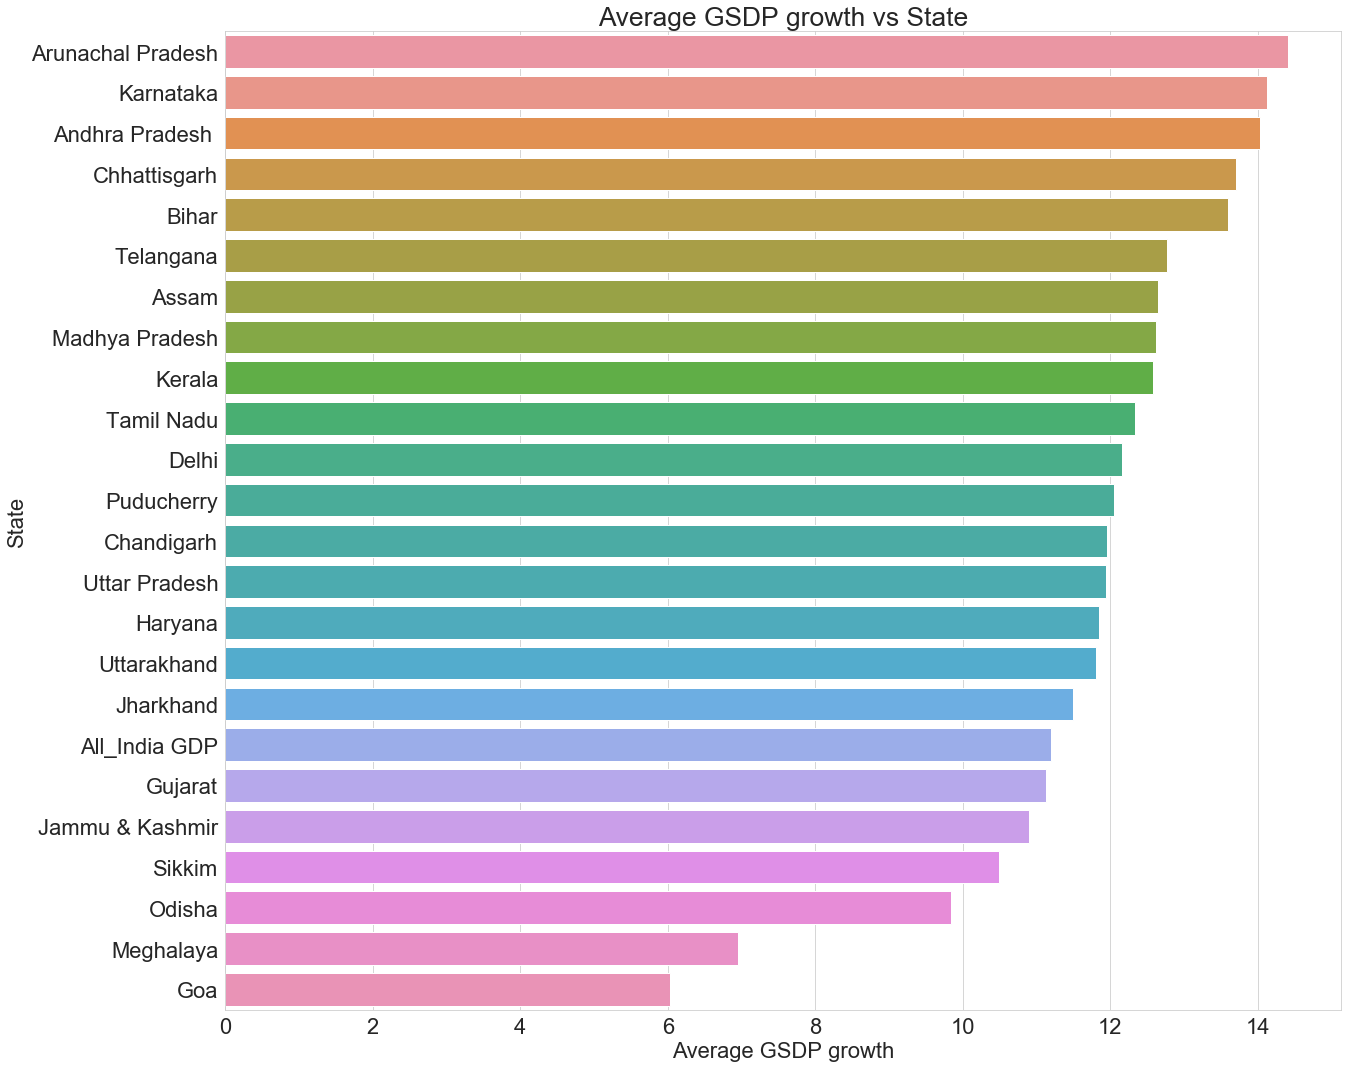

In [9]:
#Now lets plot the Series obtained in previous step
sns.set_style("whitegrid")
matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20, 18))
plt.title('Average GSDP growth vs State')
plt.xlabel('Average GSDP growth')
plt.ylabel('State')
ax = sns.barplot(x=averageGrowthdf.values,y=averageGrowthdf.index,orient='h')
plt.show()

* Which states have been growing consistently fast, and which ones have been struggling? 

In [10]:
print('Consistently fast growing states are : '+str(', '.join(list(averageGrowthdf.head(5).index))))
print('Struggling states are : '+str(', '.join(list(averageGrowthdf.tail(5).index))))

Consistently fast growing states are : Arunachal Pradesh, Karnataka, Andhra Pradesh , Chhattisgarh, Bihar
Struggling states are : Jammu & Kashmir, Sikkim, Odisha, Meghalaya, Goa


* Curiosity exercise - what has been the average growth rate of your home state, and how does it compare to the national average over this duration?

In [11]:
print('Average growth rate of Gujarat : '+ str(averageGrowthdf['Gujarat']))
print('Average growth rate of Gujarat is : '+ str((averageGrowthdf['Gujarat']/averageGrowthdf['All_India GDP'])*100) +\
     ' percentage of India GDP')

Average growth rate of Gujarat : 11.126666666666665
Average growth rate of Gujarat is : 99.31567985718534 percentage of India GDP


* ### Subtask 1-A.3

Plot the total GDP of the states for the year 2015-16

In [12]:
#Create a subset of dataset taking only rows and columns of interest
totalGDP1516 = masterdf.iloc[4:5,2:-1]
totalGDP1516

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry
4,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,NaN,118387.0,...,1212668.0,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0


In [13]:
#dropping missing data and sorting series
totalGDP1516 = totalGDP1516.dropna(axis='columns').sum().sort_values(ascending=False)
totalGDP1516.head()

Tamil Nadu         1212668.0
Uttar Pradesh      1153795.0
Karnataka          1027068.0
Gujarat             994316.0
Andhra Pradesh      609934.0
dtype: float64

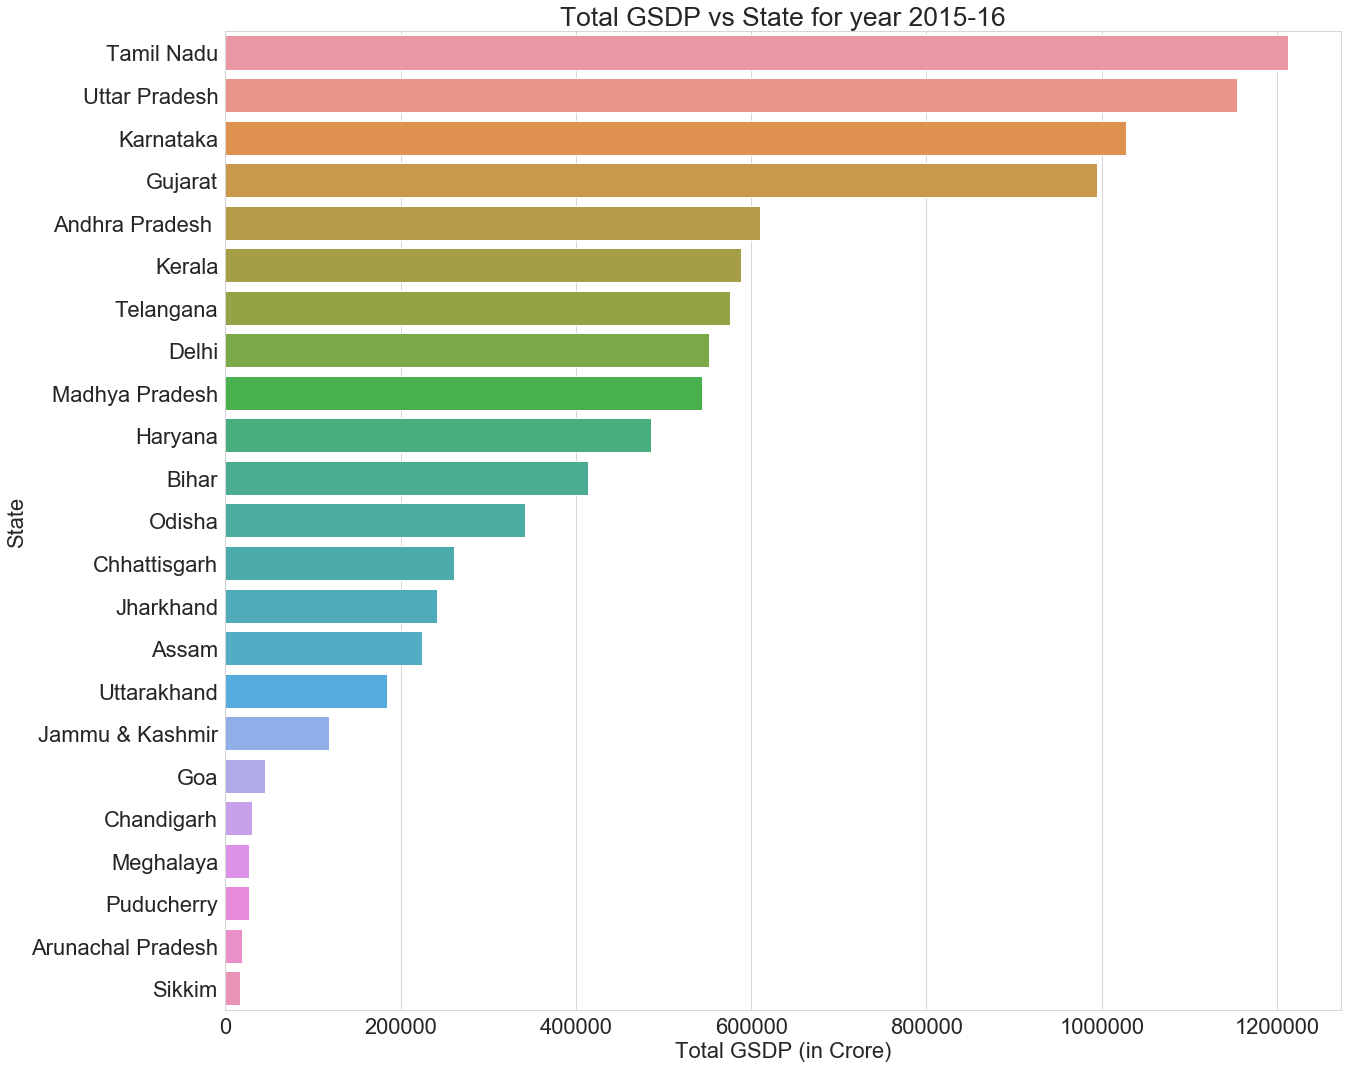

In [14]:
#Now lets plot the Series obtained in previous step
matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20, 18))
plt.title('Total GSDP vs State for year 2015-16')
plt.xlabel('Total GSDP (in Crore)')
plt.ylabel('State')
sns.barplot(x=totalGDP1516.values,y=totalGDP1516.index,orient='h')
plt.show()

* Identify the top-5 and the bottom-5 states based on total GDP

In [15]:
print('Top 5 states are : '+str(', '.join(list(totalGDP1516.head(5).index))))
print('Bottom 5 states are : '+str(', '.join(list(totalGDP1516.tail(5).index))))

Top 5 states are : Tamil Nadu, Uttar Pradesh, Karnataka, Gujarat, Andhra Pradesh 
Bottom 5 states are : Chandigarh, Meghalaya, Puducherry, Arunachal Pradesh, Sikkim


- ### Part I-B

Next, we will categorise the states into four categories based on GDP per capita and, for each of these four categories, we will analyse the sectors which contribute most to the GDP (such as agriculture, real estate, manufacturing, etc.).

Read the downloaded csv files into DataFrames and create dictionary of DataFrames with name of state as key and Dataframe as value called `df_dict`

In [16]:
#Get all csv files whose name starts with NAD
filenames = glob.glob('NAD-*.csv')
df_dict = {}
for filename in filenames:
    df_dict[filename.split('-')[1]] = pd.read_csv(filename, encoding='latin1')
print('Data imported successfully for: '+', '.join(df_dict.keys()))

Data imported successfully for: Andhra_Pradesh, Arunachal_Pradesh, Assam, Bihar, Chhattisgarh, Goa, Gujarat, Haryana, Himachal_Pradesh, Jharkhand, Karnataka, Kerala, Madhya_Pradesh, Maharashtra, Manipur, Meghalaya, Mizoram, Nagaland, Odisha, Punjab, Rajasthan, Sikkim, Tamil_Nadu, Telangana, Tripura, Uttarakhand, Uttar_Pradesh


* ### Subtask 1-B.1

Filter out the Union Territories (Delhi, Chandigarh, Andaman and Nicobar Islands etc.) for further analysis since they are governed directly by the centre, not state governments.

The Union Territories (Delhi, Chandigarh, Andaman and Nicobar Islands etc.) were exempted during download and hence the dictionary only contains 27 states and no UTs.

In [17]:
#Lets have a prelimanary look at few of these datasets
print(df_dict['Tripura'].shape)
df_dict['Tripura'].head()

(33, 6)


,S.No.,Item,2011-12,2012-13,2013-14,2014-15
0,1,"Agriculture, forestry and fishing",511201.0,567087.0,702979.0,799825.0
1,1.1,Crops,318959.0,339064.0,375086.0,397591.0
2,1.2,Livestock,33664.0,42223.0,70541.0,88176.0
3,1.3,Forestry and logging,109763.0,119262.0,133116.0,145096.0
4,1.4,Fishing and aquaculture,48815.0,66538.0,124236.0,168961.0


In [18]:
print(df_dict['Andhra_Pradesh'].shape)
df_dict['Andhra_Pradesh'].head()

(33, 8)


,S.No.,Item,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,1,"Agriculture, forestry and fishing",9400805,11186428,12895568,14819416,17326726,20386004
1,1.1,Crops,5204052,6123041,7114707,7893514,8644285,9717089
2,1.2,Livestock,2758776,3358438,3643026,4309078,5155487,5979648
3,1.3,Forestry and logging,250314,253029,280493,346160,340550,335487
4,1.4,Fishing and aquaculture,1187663,1451920,1857342,2270664,3186404,4353780


We can observe that number of columns are not same for all states. We will require all dataset to be on the same page to perform analysis. Hence lets find common columns in all datasets.

In [19]:
#Using reduce from functools and intersect1d from numpy we can find common columns
col_list = []
for i in df_dict.values():
    col_list.append(i.columns)
common_cols = reduce(np.intersect1d, col_list)
print('Common columns are: '+', '.join(common_cols))

Common columns are: 2011-12, 2012-13, 2013-14, 2014-15, Item, S.No.


Lets keep only common columns.

In [20]:
for state, data in df_dict.items():
    df_dict[state] = data.loc[:,common_cols]
df_dict['Andhra_Pradesh'].head()

,2011-12,2012-13,2013-14,2014-15,Item,S.No.
0,9400805,11186428,12895568,14819416,"Agriculture, forestry and fishing",1
1,5204052,6123041,7114707,7893514,Crops,1.1
2,2758776,3358438,3643026,4309078,Livestock,1.2
3,250314,253029,280493,346160,Forestry and logging,1.3
4,1187663,1451920,1857342,2270664,Fishing and aquaculture,1.4


Next lets explore column wise missing values for all states.

In [21]:
print('Column wise missing values\n')
for i in df_dict:
    print(i)
    print(str(df_dict[i].isna().sum())+'\n')

Column wise missing values

Andhra_Pradesh
2011-12    0
2012-13    0
2013-14    0
2014-15    0
Item       0
S.No.      0
dtype: int64

Arunachal_Pradesh
2011-12    0
2012-13    0
2013-14    0
2014-15    0
Item       0
S.No.      0
dtype: int64

Assam
2011-12    0
2012-13    0
2013-14    0
2014-15    0
Item       0
S.No.      0
dtype: int64

Bihar
2011-12    0
2012-13    0
2013-14    0
2014-15    0
Item       0
S.No.      0
dtype: int64

Chhattisgarh
2011-12    0
2012-13    0
2013-14    0
2014-15    0
Item       0
S.No.      0
dtype: int64

Goa
2011-12    0
2012-13    0
2013-14    0
2014-15    0
Item       0
S.No.      0
dtype: int64

Gujarat
2011-12    4
2012-13    4
2013-14    4
2014-15    4
Item       0
S.No.      0
dtype: int64

Haryana
2011-12    2
2012-13    2
2013-14    2
2014-15    2
Item       0
S.No.      0
dtype: int64

Himachal_Pradesh
2011-12    0
2012-13    0
2013-14    0
2014-15    0
Item       0
S.No.      0
dtype: int64

Jharkhand
2011-12    0
2012-13    1
2013-14    0


Lets explore row wise missing value for `Manipur` as it is one of the states which contains uneven `NA` values in columns.

In [22]:
#Print rows where there are missing values
print('Row wise missing values\n')
df_dict['Manipur'].loc[df_dict['Manipur'].isna().sum(axis=1)>0]

Row wise missing values



,2011-12,2012-13,2013-14,2014-15,Item,S.No.
5,NaN,NaN,NaN,NaN,Mining and quarrying,2.
17,NaN,NaN,NaN,NaN,Water transport,7.3
20,0.0,NaN,NaN,NaN,Storage,7.6


We can observe the following -
* Items which have NaN values might not contribute to the GSDP at all for that particular state for e.g. Manipur being a land locked state with no water bodies in it, `Water transport` doesnot contribute to GSDP.
* Data in `2011-12` - `Storage` is `0.0` hence sub-category `Storage` might also not contribute to GSDP. Similarly for other states where whole row values are not `NaN`, other values are 0.0.

Hence we can safely assume that `NaN` values can be replaced with 0.

In [23]:
print('Missing values\n')
for state, data in df_dict.items():
    df_dict[state] = data.fillna(0)
    print(state + ' : ' + str(df_dict[state].isna().sum().sum()))

Missing values

Andhra_Pradesh : 0
Arunachal_Pradesh : 0
Assam : 0
Bihar : 0
Chhattisgarh : 0
Goa : 0
Gujarat : 0
Haryana : 0
Himachal_Pradesh : 0
Jharkhand : 0
Karnataka : 0
Kerala : 0
Madhya_Pradesh : 0
Maharashtra : 0
Manipur : 0
Meghalaya : 0
Mizoram : 0
Nagaland : 0
Odisha : 0
Punjab : 0
Rajasthan : 0
Sikkim : 0
Tamil_Nadu : 0
Telangana : 0
Tripura : 0
Uttarakhand : 0
Uttar_Pradesh : 0


* ### Subtask 1-B.2

Plot the GDP per capita for all the states.

For this question we'll consider only the year 2014-15 and drop the rest.

In [24]:
#First lets take a backup of current data
df_dict_1415 = df_dict.copy()

#Drop all years except 2014-15, rename 2014-15 to name of state and make Item as index 
for state, data in df_dict_1415.items():
    df_dict_1415[state] = data.drop(['2011-12', '2012-13', '2013-14', 'S.No.'], axis=1)
    df_dict_1415[state] = df_dict_1415[state].rename(columns={'2014-15' : state})
    df_dict_1415[state] = df_dict_1415[state].set_index('Item')
df_dict_1415['Andhra_Pradesh'].head()

,Andhra_Pradesh
Item,
"Agriculture, forestry and fishing",14819416
Crops,7893514
Livestock,4309078
Forestry and logging,346160
Fishing and aquaculture,2270664


Now lets merge all DataFrames into a single DataFrame that will consist of 2014-15 data of all states and having index as `Item`.

By pd.merge and reduce, we'll merge all dfs in the dictionary into a single df called `masterdf`

In [25]:
masterdf = reduce(lambda left,right: pd.merge(left, right, left_index=True, right_index=True),\
                  df_dict_1415.values())
masterdf.head()

,Andhra_Pradesh,Arunachal_Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal_Pradesh,Jharkhand,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttarakhand,Uttar_Pradesh
Item,,,,,,,,,,,,,,,,,,,,,
"Agriculture, forestry and fishing",14819416,686117,3855548,7951890,3948847,308507,13769969.0,8015238.0,1514981,3211065,...,607897,6422978,9285716,15044394,137447,13064238,7591501,799825.0,1601423.0,25097754
Crops,7893514,415520,2890544,4688237,2613371,140421,9671086.0,4636731.0,853758,2094466,...,375825,4382636,5690972,7673441,114976,7297820,4162493,397591.0,866146.0,16215212
Livestock,4309078,38387,173478,2060296,352208,30141,2698910.0,2916173.0,110304,562503,...,123800,788243,2638842,5356257,17338,4693361,2951299,88176.0,391188.0,7096876
Forestry and logging,346160,224017,261987,550132,597785,15744,761616.0,352254.0,540950,445149,...,99802,791463,848245,1956660,4529,392705,210741,145096.0,339293.0,1404936
Fishing and aquaculture,2270664,8193,529539,653224,385483,122201,638357.0,110080.0,9968,108947,...,8470,460636,107657,58036,604,680352,266968,168961.0,4796.0,380730


For current task, we require only `Per Capita GSDP (Rs.)` row for all states, hence lets isolate that data.

In [26]:
#Select appropriate data, store in series and sort based on value
gdpPerCapita = pd.Series(masterdf.loc['Per Capita GSDP (Rs.)'], index=masterdf.columns).sort_values(ascending=False)
gdpPerCapita

Goa                  271793.0
Sikkim               240274.0
Haryana              164077.0
Kerala               154778.0
Uttarakhand          153076.0
Maharashtra          152853.0
Himachal_Pradesh     147330.0
Tamil_Nadu           146503.0
Karnataka            145141.0
Gujarat              141263.0
Telangana            139035.0
Punjab               126606.0
Arunachal_Pradesh    112718.0
Andhra_Pradesh       104977.0
Mizoram               97687.0
Nagaland              89607.0
Chhattisgarh          86860.0
Rajasthan             84837.0
Tripura               77358.0
Meghalaya             76228.0
Odisha                73979.0
Madhya_Pradesh        62989.0
Jharkhand             62091.0
Assam                 60621.0
Manipur               58442.0
Uttar_Pradesh         49450.0
Bihar                 33954.0
Name: Per Capita GSDP (Rs.), dtype: float64

Finally lets plot the series obtained in the previous step.

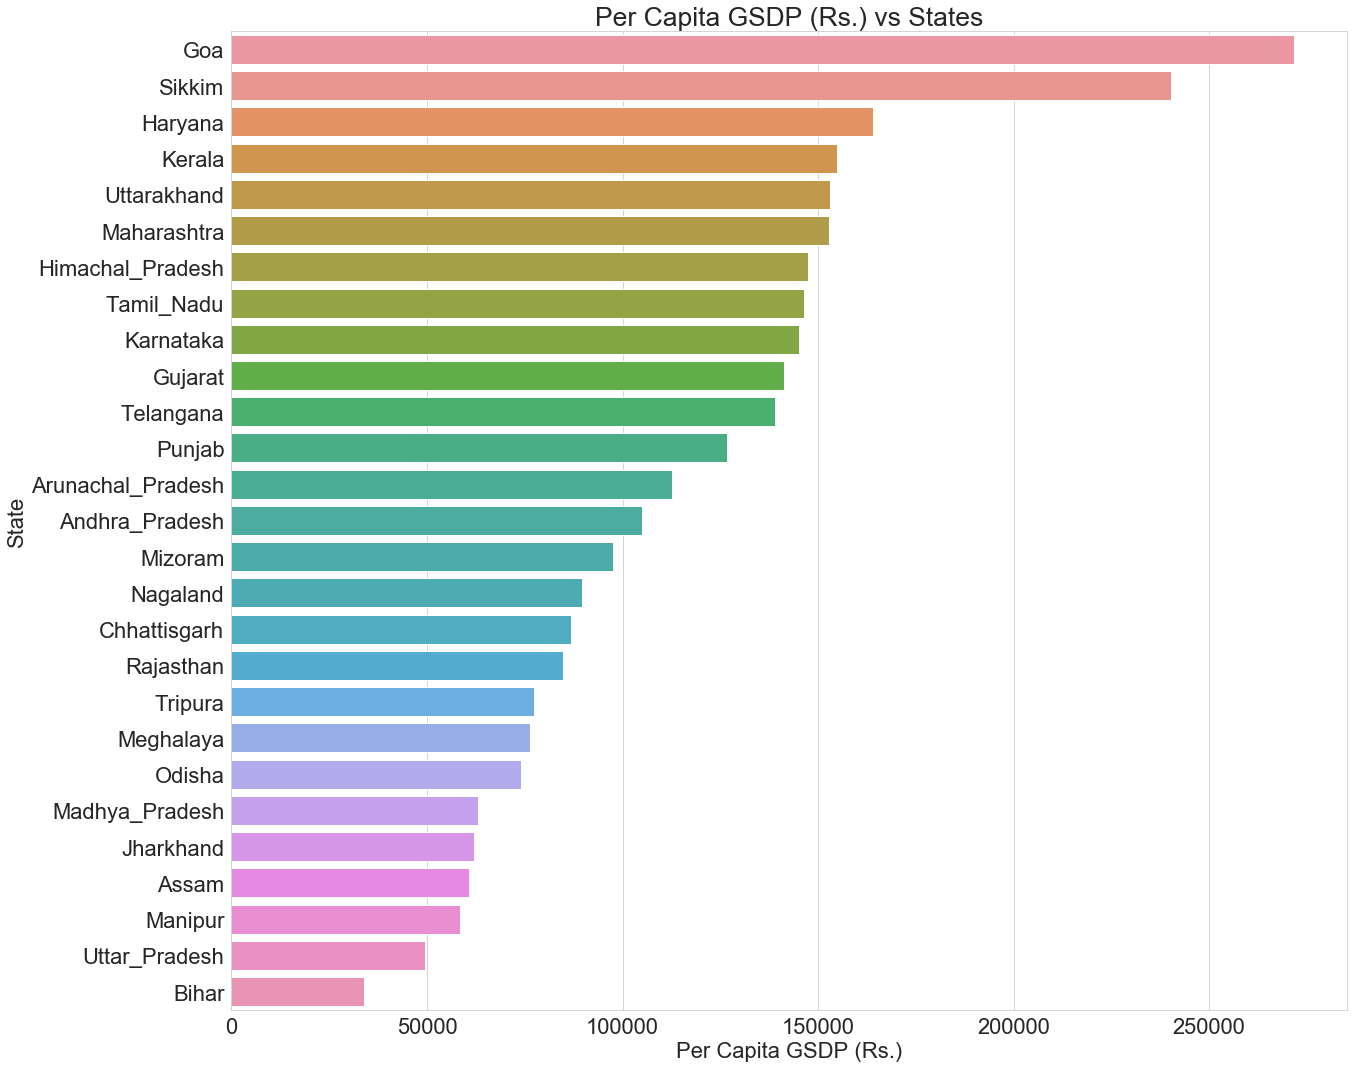

In [27]:
matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20, 18))
plt.title('Per Capita GSDP (Rs.) vs States')
plt.xlabel('Per Capita GSDP (Rs.)')
plt.ylabel('State')
sns.set_style('whitegrid')
ax = sns.barplot(x=gdpPerCapita.values,y=gdpPerCapita.index,orient='h')
plt.show()

* Identify the top-5 and the bottom-5 states based on GDP per capita.

In [28]:
top5states = gdpPerCapita.head(5)
bottom5states = gdpPerCapita.tail(5)
print('Top 5 states are :\n'+str(top5states)+'\n')
print('Bottom 5 states are :\n'+str(bottom5states))

Top 5 states are :
Goa            271793.0
Sikkim         240274.0
Haryana        164077.0
Kerala         154778.0
Uttarakhand    153076.0
Name: Per Capita GSDP (Rs.), dtype: float64

Bottom 5 states are :
Jharkhand        62091.0
Assam            60621.0
Manipur          58442.0
Uttar_Pradesh    49450.0
Bihar            33954.0
Name: Per Capita GSDP (Rs.), dtype: float64


* Find the ratio of highest per capita GDP to the lowest per capita GDP.

In [29]:
print('Ratio of highest per capita GSDP to the lowest per capita GSDP : '\
      +str(gdpPerCapita[0]/gdpPerCapita[-1]))

Ratio of highest per capita GSDP to the lowest per capita GSDP : 8.004741709371503


* ### Subtask 1-B.3

Plot the percentage contribution of primary, secondary and tertiary sectors as a percentage of total GDP for all the states.

For this task we'll calculate contribution of `Primary`, `Secondary` and `Tertiary` on total `Gross State Domestic Product` of the state and merge data to get DataFrame called `contributionDf`

In [30]:
primaryContribution = pd.Series((masterdf.loc['Primary']/masterdf.loc['Gross State Domestic Product'])*100).values
secondaryContribution = pd.Series((masterdf.loc['Secondary']/masterdf.loc['Gross State Domestic Product'])*100).values
tertiaryContribution = pd.Series((masterdf.loc['Tertiary']/masterdf.loc['Gross State Domestic Product'])*100).values
states = pd.Series(list(masterdf.columns))

contributionDf = pd.DataFrame({'State' : states,\
                               'Primary' : primaryContribution,\
                               'Secondary' : secondaryContribution,\
                               'Tertiary' : tertiaryContribution})
contributionDf.head()

,State,Primary,Secondary,Tertiary
0,Andhra_Pradesh,30.968080,19.923102,41.850453
1,Arunachal_Pradesh,42.774946,17.152064,37.696846
2,Assam,26.889201,20.359070,46.982347
3,Bihar,21.448437,16.005825,59.317437
4,Chhattisgarh,27.239629,35.061805,32.295173


Before ploting the graph we'll have to unpivot the contribution columns so that they can be used hue arguments to the plot. This will remove contribution columns and add new columns called `Sector` and `Sector Percentage Contribution`

In [31]:
cdf = pd.melt(contributionDf, id_vars='State', var_name="Sector", value_name="Sector Percentage Contribution")
cdf.head()

,State,Sector,Sector Percentage Contribution
0,Andhra_Pradesh,Primary,30.968080
1,Arunachal_Pradesh,Primary,42.774946
2,Assam,Primary,26.889201
3,Bihar,Primary,21.448437
4,Chhattisgarh,Primary,27.239629


Finally lets plot the resultant DataFrame.

<Figure size 1440x1296 with 0 Axes>

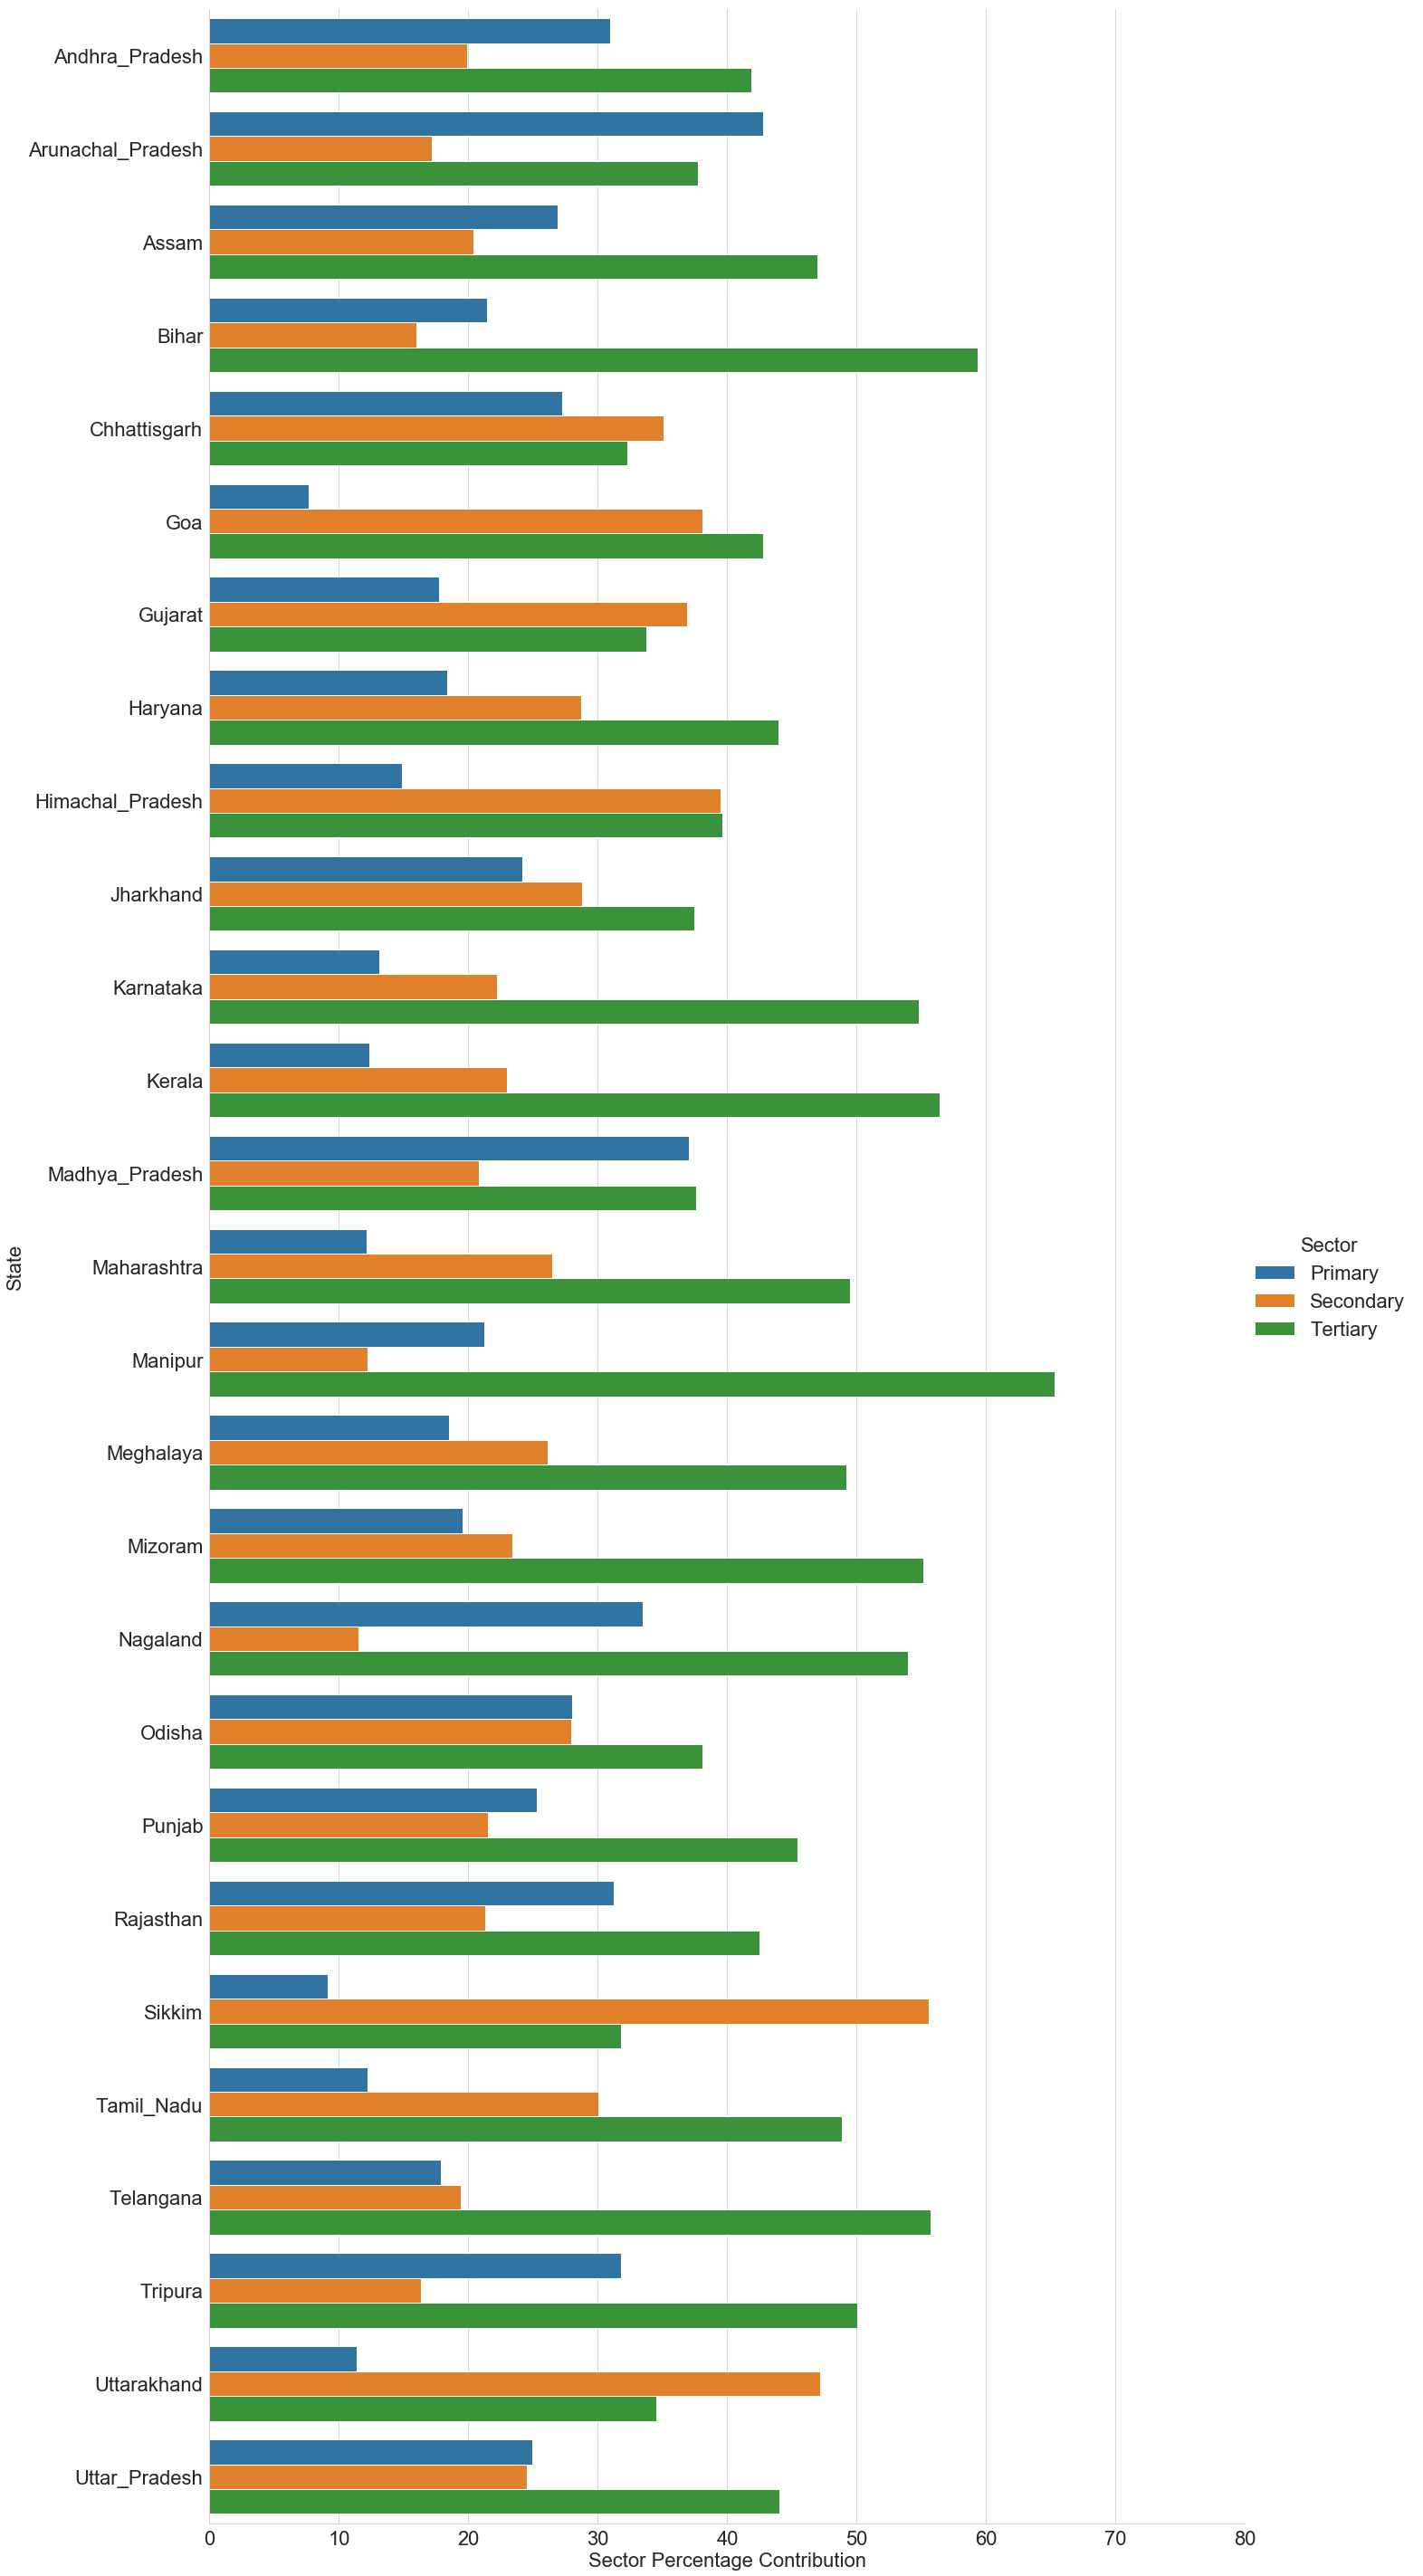

In [32]:
plt.figure(figsize=(20, 18))
sns.set_style('whitegrid')
ax = sns.catplot(x='Sector Percentage Contribution', y='State', hue='Sector', data=cdf, kind='bar',\
                 orient='h', height=40, aspect=0.5)
ax.set(xlim=(0, 80))
plt.show()

* ### Subtask 1-B.4

Categorise the states into four categories based on GDP per capita (C1, C2, C3, C4 - C1 would have the highest per capita GPD, C4 the lowest).

For this task we'll use the `gdpPerCapita` series created in Subtask 1-B.2 and make cuts according to the given quantiles.

In [33]:
categories = pd.qcut(gdpPerCapita, q=[0,0.20,0.5, 0.85, 1], labels=['C4', 'C3', 'C2', 'C1'])
categories = pd.DataFrame(categories)
categories = categories.reset_index()
categories.columns = ['State', 'Category']
categories

,State,Category
0,Goa,C1
1,Sikkim,C1
2,Haryana,C1
3,Kerala,C1
4,Uttarakhand,C2
5,Maharashtra,C2
6,Himachal_Pradesh,C2
7,Tamil_Nadu,C2
8,Karnataka,C2
9,Gujarat,C2


Next we'll create separate DataFrames for each category with column `Item` from masterdf's index and `Value` that will hold sum of values of all states in that category for each Item. These DataFrames will represent the state of respective categories.

In [34]:
c1States = categories.loc[categories['Category']=='C1','State']
c1df = masterdf.loc[:,c1States].sum(axis=1).reset_index()
c1df.columns = ['Item', 'Value']


c2States = categories.loc[categories['Category']=='C2','State']
c2df = masterdf.loc[:,c2States].sum(axis=1).reset_index()
c2df.columns = ['Item', 'Value']

    
c3States = categories.loc[categories['Category']=='C3','State']
c3df = masterdf.loc[:,c3States].sum(axis=1).reset_index()
c3df.columns = ['Item', 'Value']

    
c4States = categories.loc[categories['Category']=='C4','State']
c4df = masterdf.loc[:,c4States].sum(axis=1).reset_index()
c4df.columns = ['Item', 'Value']

c1df.head()

,Item,Value
0,"Agriculture, forestry and fishing",14391809.0
1,Crops,7962514.0
2,Livestock,4619756.0
3,Forestry and logging,872335.0
4,Fishing and aquaculture,937204.0


* ### Subtask 1-B.5

For each category C1, C2, C3, C4:

* Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc.) \[not primary, secondary and tertiary\] which contribute to approx. 80% of the GSDP of each category

For this task we'll have to remove `TOTAL GSVA at basic prices`, `Tertiary`, `Secondary`, `Primary`, `Per Capita GSDP (Rs.)`, `Population (\'00)`, `Taxes on Products`, `Subsidies on products` as these are not sub-sectors. We'll keep `Gross State Domestic Product` as it is required to find percentage conntribution.

In [35]:
remove_rows = ['TOTAL GSVA at basic prices', 'Tertiary', 'Secondary', 'Primary',\
               'Per Capita GSDP (Rs.)', 'Population (\'00)', 'Taxes on Products', 'Subsidies on products']

#keep all rows except where Item in remove_rows, sort by Value and reset index so that for all category, it starts with 0
c1df = c1df.loc[~c1df['Item'].isin(remove_rows)].sort_values(by='Value', ascending=False).reset_index(drop=True)
c2df = c2df.loc[~c2df['Item'].isin(remove_rows)].sort_values(by='Value', ascending=False).reset_index(drop=True)
c3df = c3df.loc[~c3df['Item'].isin(remove_rows)].sort_values(by='Value', ascending=False).reset_index(drop=True)
c4df = c4df.loc[~c4df['Item'].isin(remove_rows)].sort_values(by='Value', ascending=False).reset_index(drop=True)

c1df

,Item,Value
0,Gross State Domestic Product,101930677.0
1,"Real estate, ownership of dwelling & professio...",14740245.0
2,"Agriculture, forestry and fishing",14391809.0
3,"Trade, repair, hotels and restaurants",13995159.0
4,Manufacturing,13758793.0
5,Construction,11264451.0
6,Other services,8059922.0
7,Crops,7962514.0
8,"Transport, storage, communication & services r...",6818560.0
9,Livestock,4619756.0


Now lets divide all Values by GSDP to find percentage contribution of each sub-sector.

In [36]:
c1df['Value'] = (c1df['Value']/c1df.loc[0:1,'Value'].iloc[0])*100
c1TopSectors = (np.sum(c1df.loc[1:7,'Value'])/c1df.loc[0:1,'Value'].iloc[0])*100
print('Top Sub-sectors of C1 category are:\n'+'\n'.join(c1df.loc[1:7,'Item'].values)+'\nand contribute: '+str(c1TopSectors)+'%')

Top Sub-sectors of C1 category are:
Real estate, ownership of dwelling & professional services
Agriculture, forestry and fishing
Trade, repair, hotels and restaurants
Manufacturing
Construction
Other services
Crops
and contribute: 82.57856758863673%


In [37]:
c2df['Value'] = (c2df['Value']/c2df.loc[0:1,'Value'].iloc[0])*100
c2TopSectors = (np.sum(c2df.loc[1:7,'Value'])/c2df.loc[0:1,'Value'].iloc[0])*100
print('Top Sub-sectors of C2 category are:\n'+'\n'.join(c2df.loc[1:7,'Item'].values)+'\nand contribute: '+str(c2TopSectors)+'%')

Top Sub-sectors of C2 category are:
Manufacturing
Real estate, ownership of dwelling & professional services
Agriculture, forestry and fishing
Trade, repair, hotels and restaurants
Crops
Construction
Financial services
and contribute: 78.83382834869809%


In [38]:
c3df['Value'] = (c3df['Value']/c3df.loc[0:1,'Value'].iloc[0])*100
c3TopSectors = (np.sum(c3df.loc[1:6,'Value'])/c3df.loc[0:1,'Value'].iloc[0])*100
print('Top Sub-sectors of C3 category are:\n'+'\n'.join(c3df.loc[1:6,'Item'].values)+'\nand contribute: '+str(c3TopSectors)+'%')

Top Sub-sectors of C3 category are:
Agriculture, forestry and fishing
Crops
Manufacturing
Trade, repair, hotels and restaurants
Real estate, ownership of dwelling & professional services
Construction
and contribute: 77.04763034830842%


In [39]:
c4df['Value'] = (c4df['Value']/c4df.loc[0:1,'Value'].iloc[0])*100
c4TopSectors = (np.sum(c4df.loc[1:6,'Value'])/c4df.loc[0:1,'Value'].iloc[0])*100
print('Top Sub-sectors of C4 category are:\n'+'\n'.join(c4df.loc[1:6,'Item'].values)+'\nand contribute: '+str(c4TopSectors)+'%')

Top Sub-sectors of C4 category are:
Agriculture, forestry and fishing
Crops
Trade, repair, hotels and restaurants
Manufacturing
Real estate, ownership of dwelling & professional services
Construction
and contribute: 83.81113674680164%


* Plot the contribution of the sub-sectors as a percentage of the GSDP of each category.

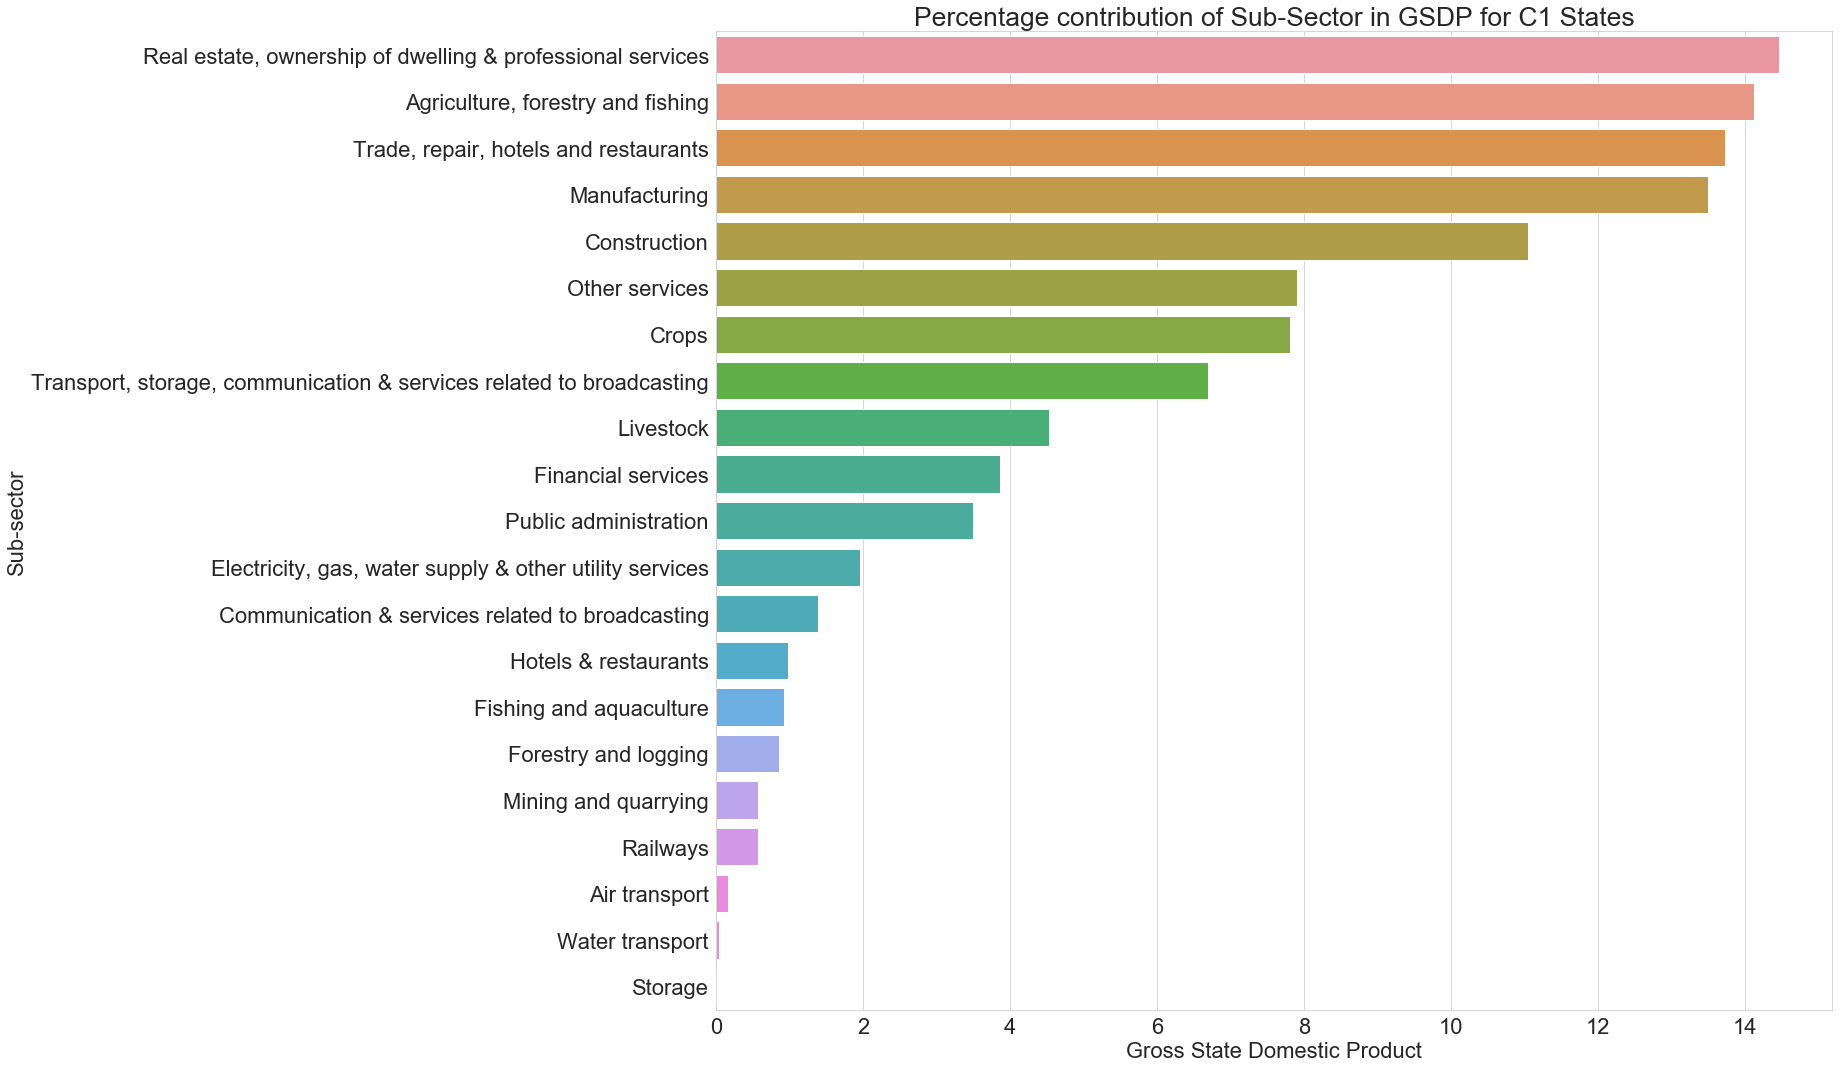

In [40]:
matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20, 18))
plt.title('Percentage contribution of Sub-Sector in GSDP for C1 States')
ax = sns.barplot(x='Value',y='Item',data=c1df[1:],orient='h')
ax.set(xlabel='Gross State Domestic Product', ylabel='Sub-sector')
plt.show()

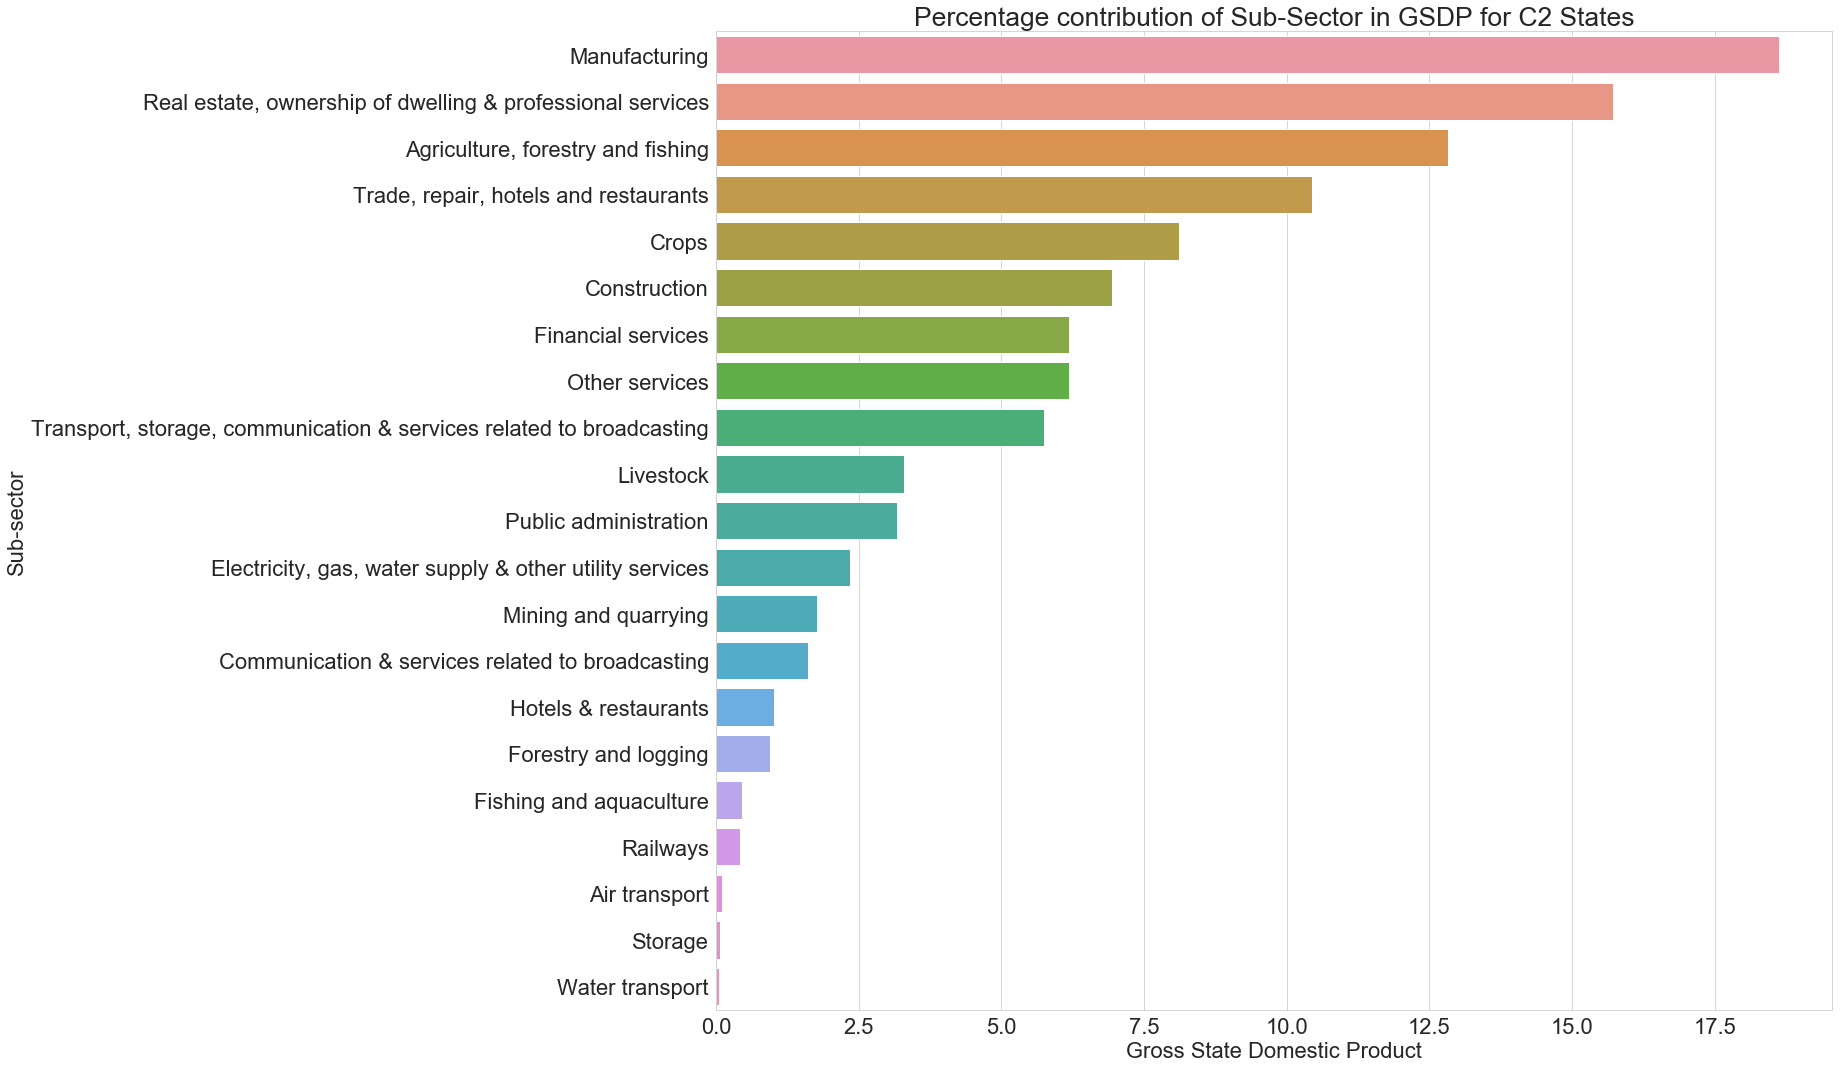

In [41]:
matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20, 18))
plt.title('Percentage contribution of Sub-Sector in GSDP for C2 States')
ax = sns.barplot(x='Value',y='Item',data=c2df[1:],orient='h')
ax.set(xlabel='Gross State Domestic Product', ylabel='Sub-sector')
plt.show()

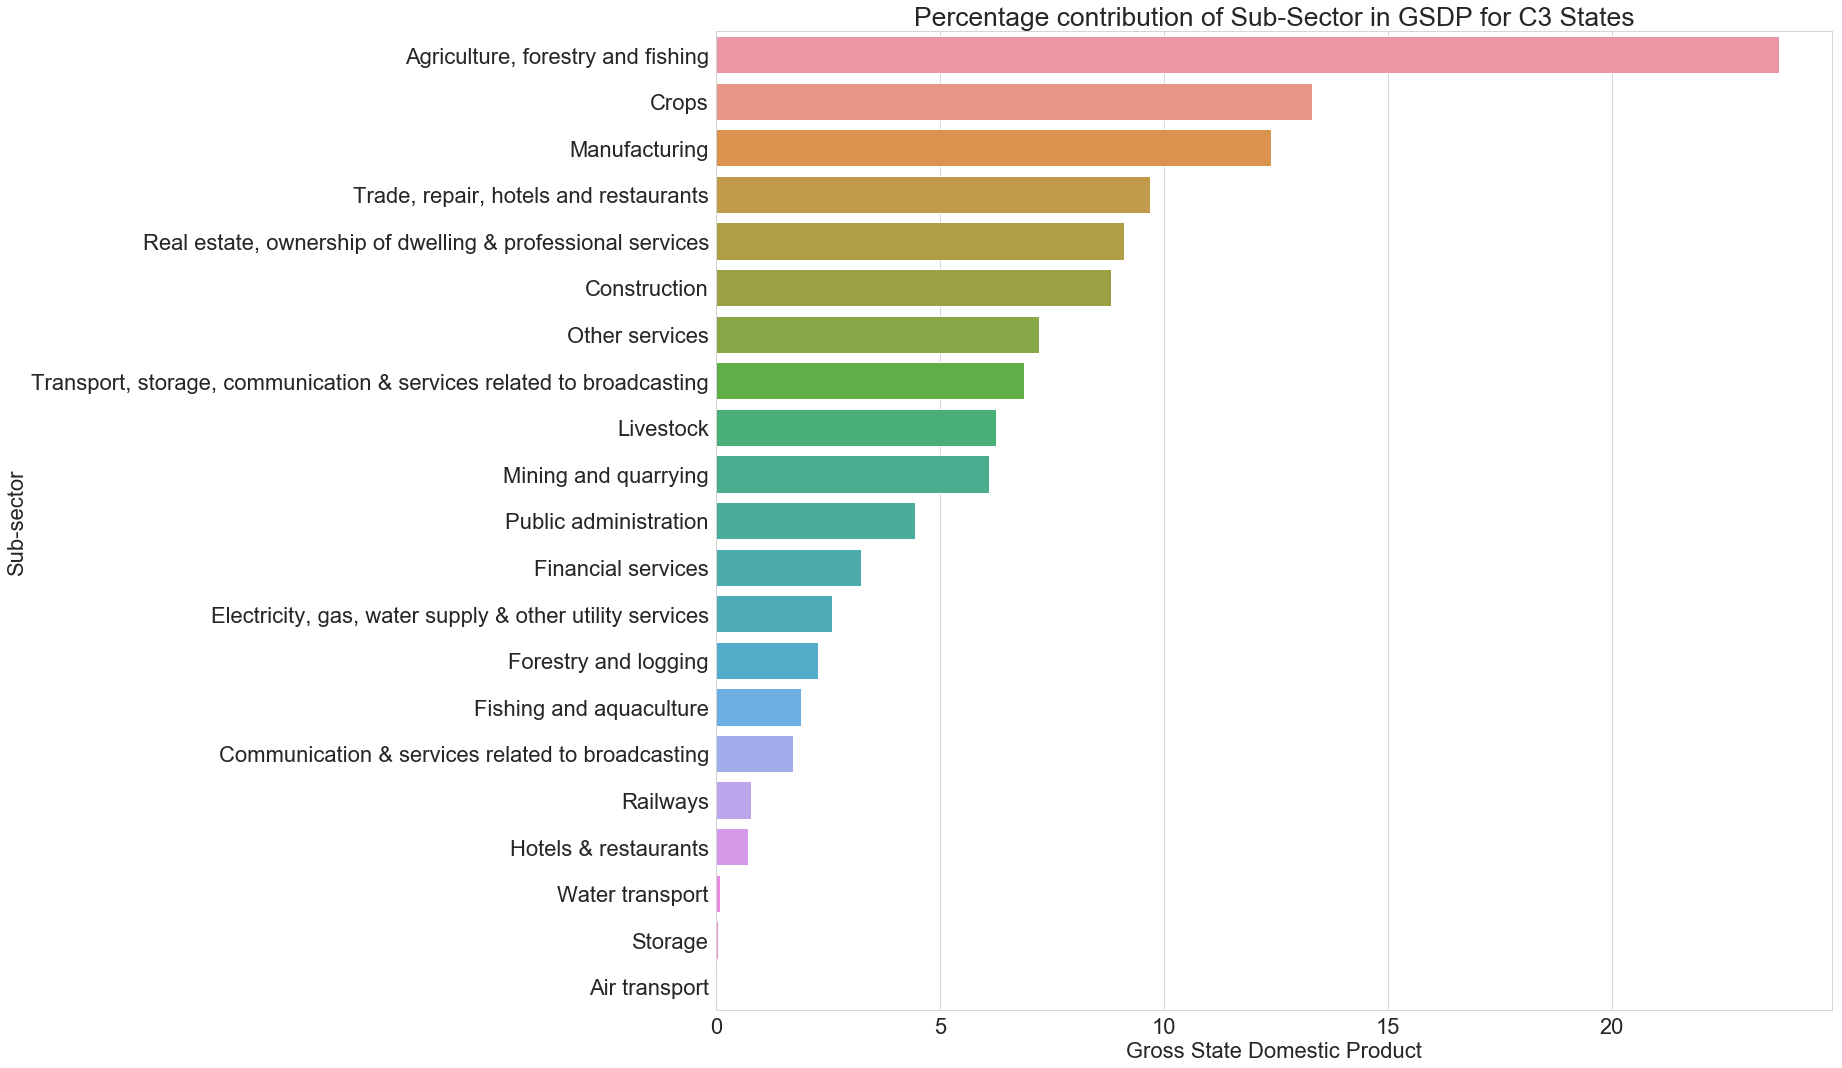

In [42]:
matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20, 18))
plt.title('Percentage contribution of Sub-Sector in GSDP for C3 States')
ax = sns.barplot(x='Value',y='Item',data=c3df[1:],orient='h')
ax.set(xlabel='Gross State Domestic Product', ylabel='Sub-sector')
plt.show()

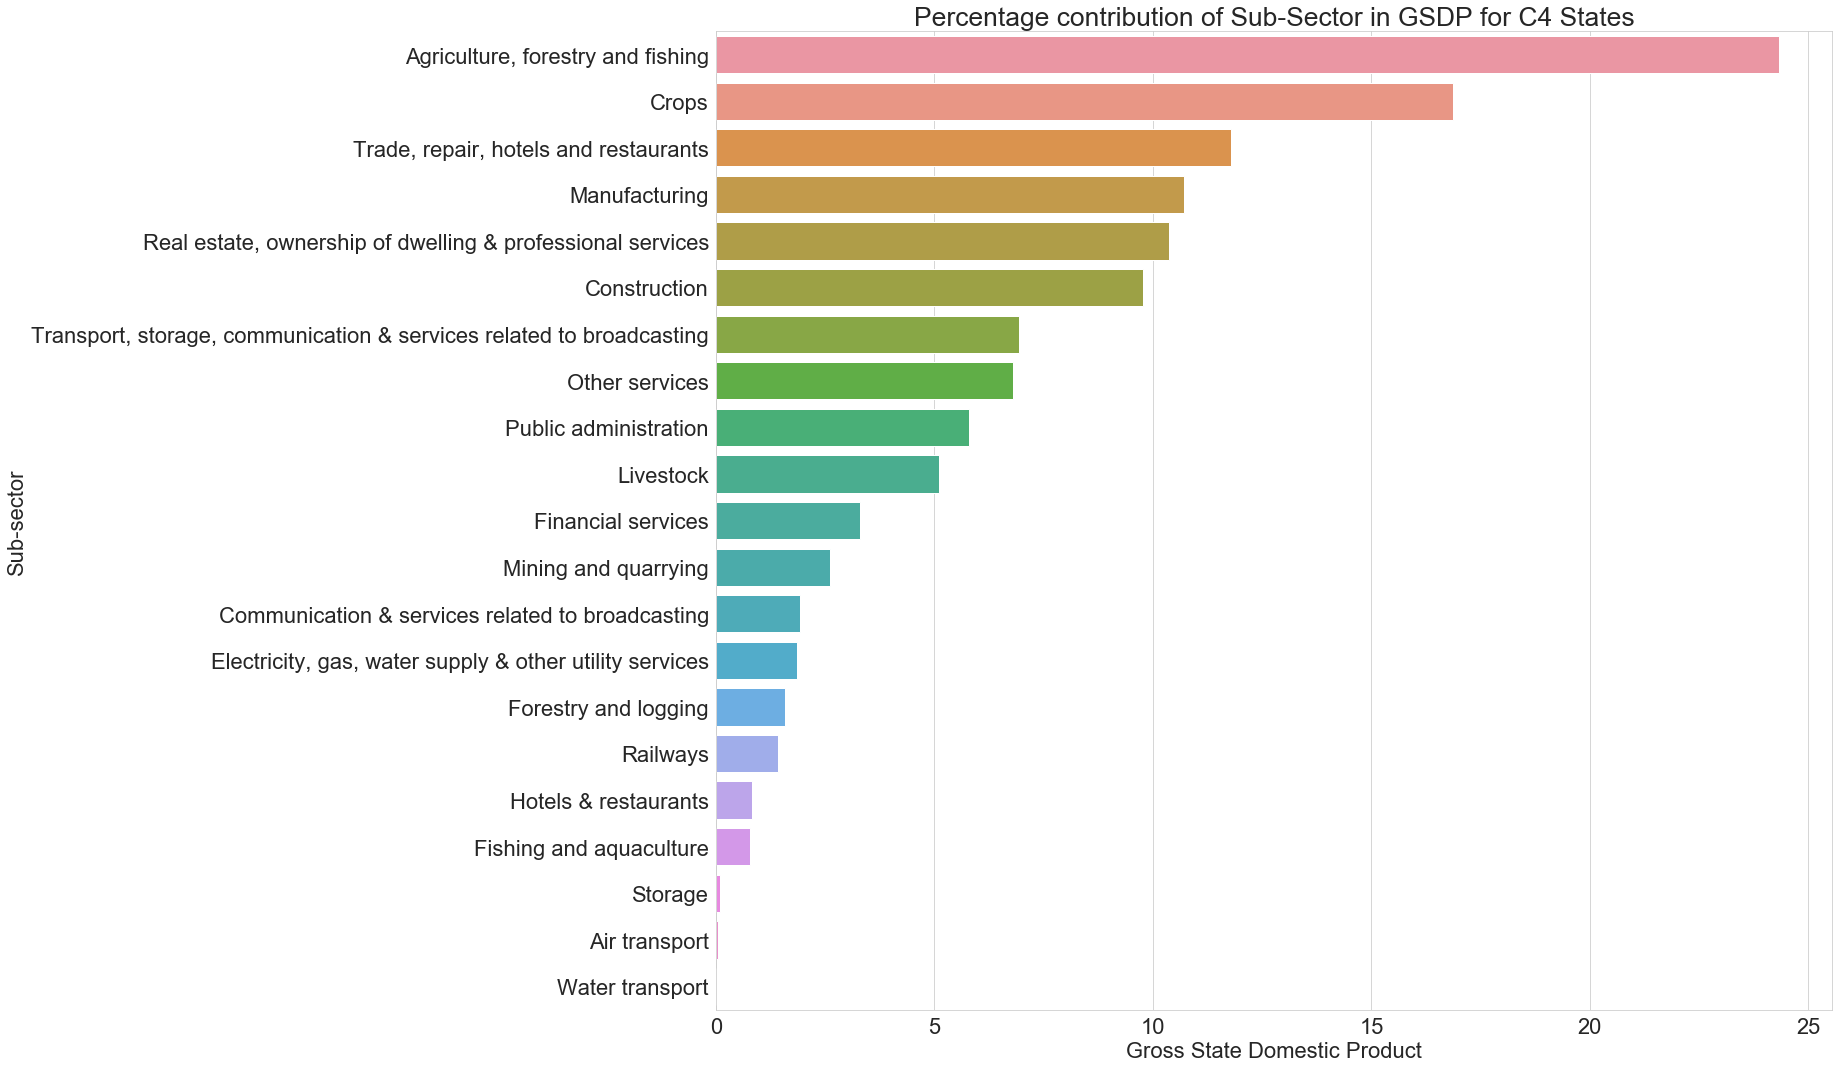

In [43]:
matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20, 18))
plt.title('Percentage contribution of Sub-Sector in GSDP for C4 States')
ax = sns.barplot(x='Value',y='Item',data=c4df[1:],orient='h')
ax.set(xlabel='Gross State Domestic Product', ylabel='Sub-sector')
plt.show()

* How does the GDP distribution of the top states (C1) differ from the others?

I noticed that percentage contribution of sub-sectors in C1 Category is fairly distributed(top 4 contributing 13-14% each) i.e. States in C1 category focuses on all aspect of their economy. Also major contribution in C1 states come from Service (Tertiary) Sector

* Which sub-sectors seem to be correlated with high GDP?

`Real estate, ownership of dwelling & professional services` seems to be highly correlated to GDP as it contributes highest in C1 and its contribution depriciates as we move from C1 to C4.

* Which sub-sectors do the various categories need to focus on? and Finally, provide at least two recommendations for each category to improve the per capita GDP.

   - C1 should focus on: Various service sectors as despite having high GSDP per capita, they lack in `Financial Service`, `Utility Services` and `Transport Services`.
   - C2 should focus on: Various service sectors as well as `Crops` and `Livestock` as they are neccesasry to maintain the balance of import and export.
   - C3 should focus on: `Manufacturing` and `Mining` sectors as it will induce industry growth and industry revolution is the next phase of development for C3.
   - C4 should focus on: `Trade`, `Manufacturing` and `Construction` as infrastructure is important for growth at preliminary stages. Also more focus can be given to improving techniques for `Agriculture` and `Crops` as they form basis for C4.  

## Part II - GDP and Education Drop-out Rates

- ### Part II

We will investigate whether there is any relationship between per capita GDP with drop-out rates in education.

Read the downloaded csv files into DataFrames and create dictionary of DataFrames with name of state as key and Dataframe as value called `df_dict`

In [44]:
#Get all csv files whose name starts with NAD
filenames = glob.glob('NAD-*.csv')
df_dict = {}
for filename in filenames:
    df_dict[filename.split('-')[1]] = pd.read_csv(filename, encoding='latin1')
df_dict.keys()

dict_keys(['Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil_Nadu', 'Telangana', 'Tripura', 'Uttarakhand', 'Uttar_Pradesh'])

* ### Subtask 2.1

Analyse if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for the states.

For current task, we require only `Per Capita GSDP (Rs.)` row for all states, hence lets isolate that data.

In [45]:
gdpPerCapita = []
for i in df_dict.values():
    gdpPerCapita.append(i.loc[i['Item'] == 'Per Capita GSDP (Rs.)', '2014-15'].iloc[0])
gdpPerCapita = pd.Series(gdpPerCapita, index=df_dict.keys())
gdpPerCapita.head()

Andhra_Pradesh       104977.0
Arunachal_Pradesh    112718.0
Assam                 60621.0
Bihar                 33954.0
Chhattisgarh          86860.0
dtype: float64

We'll also require Dropout rates data, so lets import that.

In [46]:
dropoutDf = pd.read_csv('./rs_session243_au570_1.1.csv')
dropoutDf.head()

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


Next, lets remove columns which are not required for the analysis.

In [47]:
dropoutDf = dropoutDf.drop(columns=['Sl. No.', 'Primary - 2012-2013', 'Primary - 2014-2015.1', 'Upper Primary - 2012-2013',\
               'Upper Primary - 2013-2014', 'Secondary - 2012-2013', 'Secondary - 2013-2014',\
               'Senior Secondary - 2012-2013', 'Senior Secondary - 2013-2014', 'Senior Secondary - 2014-2015'])
dropoutDf.head()

,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,A & N Islands,1.21,1.69,9.87
1,Andhra Pradesh,4.35,5.20,15.71
2,Arunachal Pradesh,10.89,6.71,17.11
3,Assam,7.44,10.51,27.06
4,Bihar,2.09,4.08,25.90


We can observe that name of states are formatted differently in GDP and droupout dataset. Words in name of states are seperated by space(' ') in dropout dataset and underscore('_') in GDP dataset. So lets make the formatting same by adding replacing space with underscore in dropout dataset. This will help during merging of datasets. 

In [48]:
dropoutDf.columns = ['State', 'Primary', 'Upper_Primary', 'Secondary']
dropoutDf['State'] = dropoutDf['State'].str.replace(' ', '_')
dropoutDf = dropoutDf.set_index('State')
del dropoutDf.index.name
dropoutDf.head()

,Primary,Upper_Primary,Secondary
A_&_N_Islands,1.21,1.69,9.87
Andhra_Pradesh,4.35,5.20,15.71
Arunachal_Pradesh,10.89,6.71,17.11
Assam,7.44,10.51,27.06
Bihar,2.09,4.08,25.90


Before diving into joining and correlation part, lets have a look at row wise missing data.

In [49]:
dropoutDf[dropoutDf.isna().sum(axis=1)>0]

,Primary,Upper_Primary,Secondary
Chandigarh,NaN,0.44,NaN
Delhi,NaN,0.76,11.810
Kerala,NaN,NaN,12.320
Lakshadweep,NaN,2.78,6.763
Tamil_Nadu,0.46,NaN,8.100


We can observe that out of 5, 3 are Union Terretories. Also, for `Kerela` and `Tamil_Nadu`, we donot have enough data to find approximate value that can be used for imputation. Hence, we'll drop rows where data is missing.

In [50]:
dropoutDf = dropoutDf[~(dropoutDf.isna().sum(axis=1)>0)]
print('Number of missing values in dropoutDf: '+str(dropoutDf.isna().sum(axis=1).sum()))

Number of missing values in dropoutDf: 0


Now lets perform and outer merge and check if the resultant dataframe is what we require.

In [51]:
dropoutDf.join(gdpPerCapita.to_frame(), how='outer')

,Primary,Upper_Primary,Secondary,0
A_&_N_Islands,1.21,1.69,9.87,NaN
All_India,4.34,4.03,17.06,NaN
Andhra_Pradesh,4.35,5.20,15.71,104977.0
Arunachal_Pradesh,10.89,6.71,17.11,112718.0
Assam,7.44,10.51,27.06,60621.0
Bihar,2.09,4.08,25.90,33954.0
Chhatisgarh,1.42,5.85,21.26,NaN
Chhattisgarh,NaN,NaN,NaN,86860.0
Dadra_&_Nagar_Haveli,1.57,4.02,16.77,NaN
Daman_&_Diu,0.85,3.11,32.27,NaN


We can observe that there are multiple `NaN` values as UT's, All India's and West Bengal's data is not available in `gdpPerCapita` and Kerela's and Tamil_Nadu's data is not available in `dropoutDf`. Also there are anomalies in names of states in dropoutDf. Hence, we'll need to change names in `dropoutDf` for `Chhatisgarh` and `Uttrakhand` and take `inner join` instead of `outer join`.

In [52]:
dropoutDf = dropoutDf.rename(index={'Chhatisgarh':'Chhattisgarh', 'Uttrakhand':'Uttarakhand'})
dropout_GDPPC = dropoutDf.join(gdpPerCapita.to_frame(), how='inner')
dropout_GDPPC = dropout_GDPPC.rename(columns={0 : 'GDP per capita'})
dropout_GDPPC

,Primary,Upper_Primary,Secondary,GDP per capita
Andhra_Pradesh,4.35,5.20,15.71,104977.0
Arunachal_Pradesh,10.89,6.71,17.11,112718.0
Assam,7.44,10.51,27.06,60621.0
Bihar,2.09,4.08,25.90,33954.0
Chhattisgarh,1.42,5.85,21.26,86860.0
Goa,0.20,0.07,11.15,271793.0
Gujarat,0.76,6.41,25.04,141263.0
Haryana,0.41,5.81,15.89,164077.0
Himachal_Pradesh,0.46,0.87,6.07,147330.0
Jharkhand,6.41,8.99,24.00,62091.0


Finally, lets plot the correlation between all 3 columns.

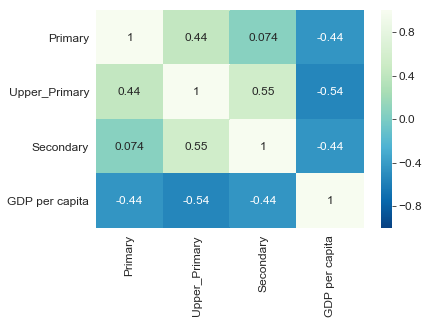

In [53]:
#Get correlation matrix using corr() method
corr = dropout_GDPPC.corr()

#Plot correlation matrix using heatmap from seaborn
matplotlib.rcParams.update({'font.size': 12})
sns.heatmap(corr, vmin=-1, vmax=1, cmap='GnBu_r', annot=True)

* ### Subtask 2.2

Write the key insights you observe from this data: Form at least one reasonable hypothesis for the observations from the data.

1. Firstly, in statistics, correlation is any statistical relationship, whether causal or not, between two random variables or bivariate data. In our case we are trying to find relationship, if any present, between dropout rates from primary, upper primary and secondary education and GDP per capita.


2. Correlation is measured between -1 to 1. Sign of the number gives direction of correlation(negative or positive) and absolute value gives the magnitude of correlation.


3. We can clearly observe that all 3 types of education(primary, upper primary and secondary) have moderately negative correlation with GDP per capita i.e. -0.44, -0.54 and -0.44 respectively.


4. This helps us to hypothesize that with the increase in dropout rates, the GDP per capita of that state decreases moderately. This is expected as with increase in dropout rates, decreases skilled labour which are required in tretiary sector which in turn hinder GDP of a state.


5. Also we can observe moderately high positive correlation between Secondary and Upper_Primary dropout rates. This tells us that states in which dropout rates are high in Upper_Primary education should take measures to preventfurther dropouts in Secondary education